<a href="https://colab.research.google.com/github/SeathWR/Proyectos_hobby/blob/main/Analisis_moviles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

In [2]:
from google.colab import files

In [3]:
load = files.upload()

Saving user_behavior_dataset.csv to user_behavior_dataset.csv


In [4]:
data_moviles = pd.read_csv('user_behavior_dataset.csv')

# **Exploracion de datos**

In [5]:
data_moviles.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [7]:
data_moviles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [8]:
data_moviles.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [9]:
data_moviles.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


# **Visualizacion **

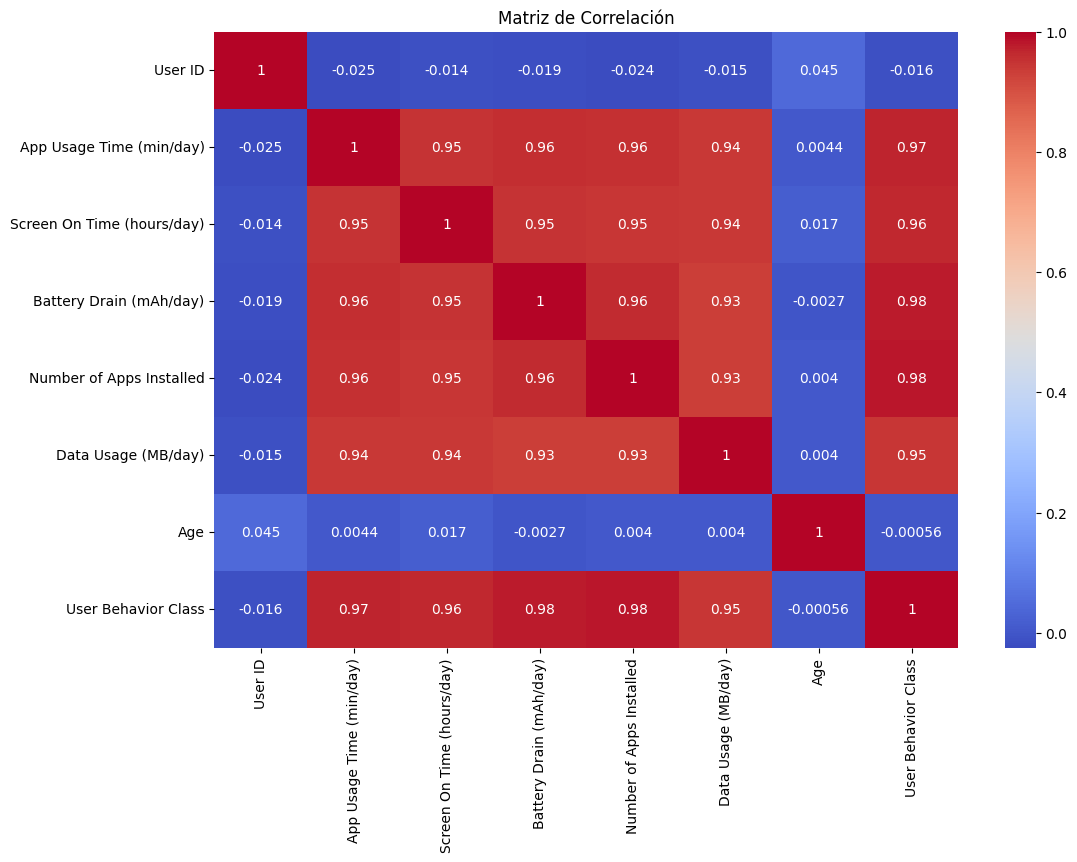

In [11]:
plt.figure(figsize=(12,8))
numerical_data = data_moviles.select_dtypes(include=['number'])  #SELECCIONAMOS SOLO LAS COLUMNAS NUMERICAS
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

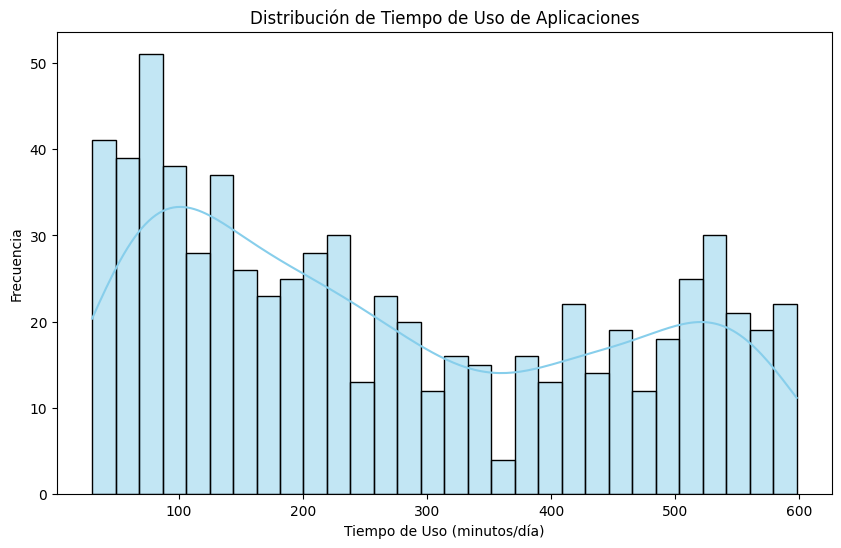

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data_moviles['App Usage Time (min/day)'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Tiempo de Uso de Aplicaciones')
plt.xlabel('Tiempo de Uso (minutos/día)')
plt.ylabel('Frecuencia')
plt.show()

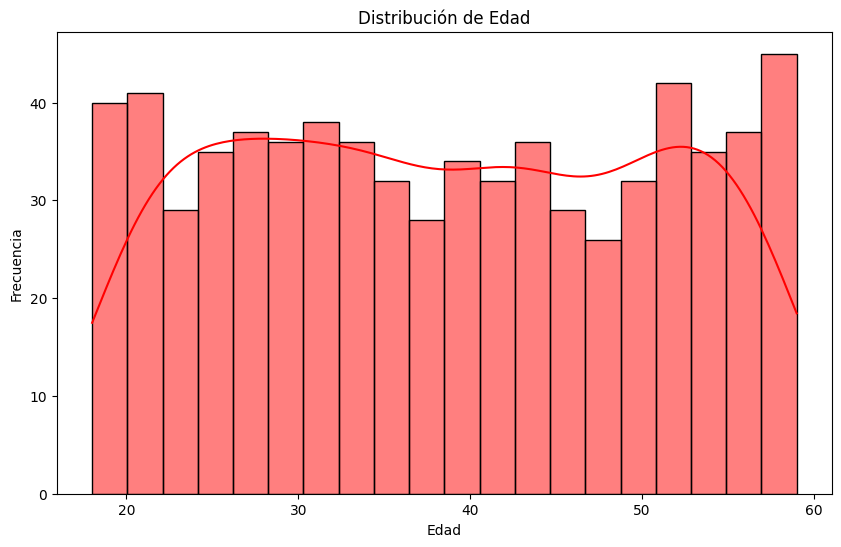

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data_moviles['Age'], bins=20, kde=True, color='red')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Text(0.5, 0, 'Tipo de Dispositivo')

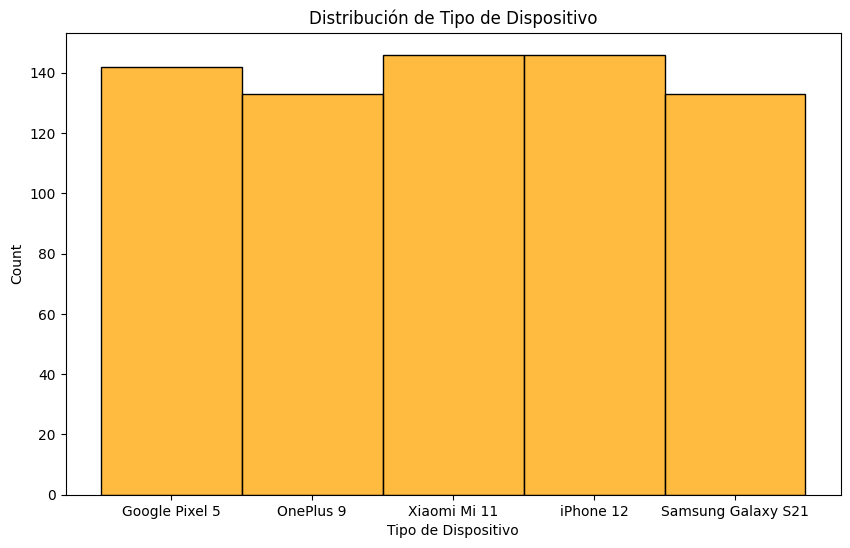

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data_moviles['Device Model'], color='orange')
plt.title('Distribución de Tipo de Dispositivo')
plt.xlabel('Tipo de Dispositivo')


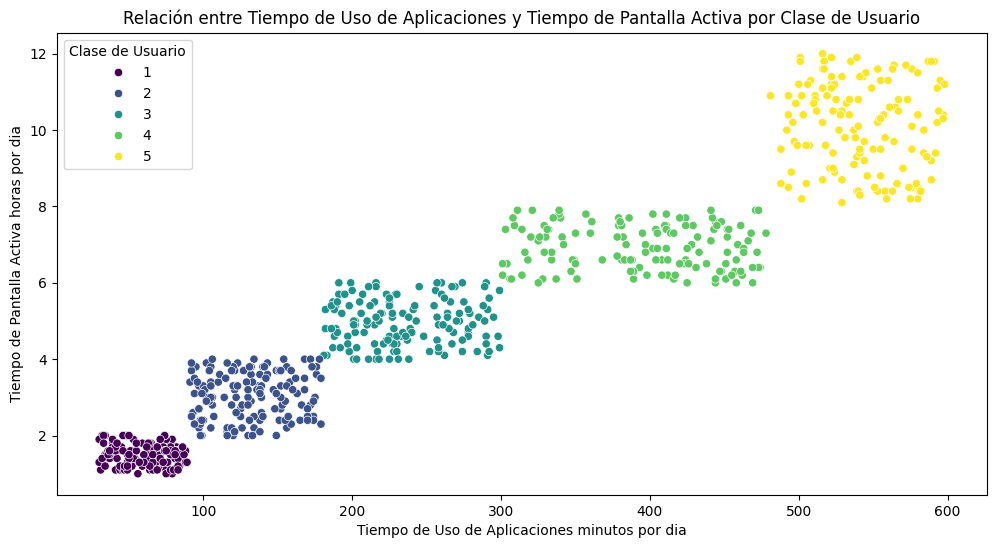

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='App Usage Time (min/day)', y='Screen On Time (hours/day)', data=data_moviles, hue= 'User Behavior Class', palette='viridis')
plt.xlabel('Tiempo de Uso de Aplicaciones minutos por dia')
plt.ylabel('Tiempo de Pantalla Activa horas por dia')
plt.title('Relación entre Tiempo de Uso de Aplicaciones y Tiempo de Pantalla Activa por Clase de Usuario')
plt.legend(title='Clase de Usuario')
plt.show()

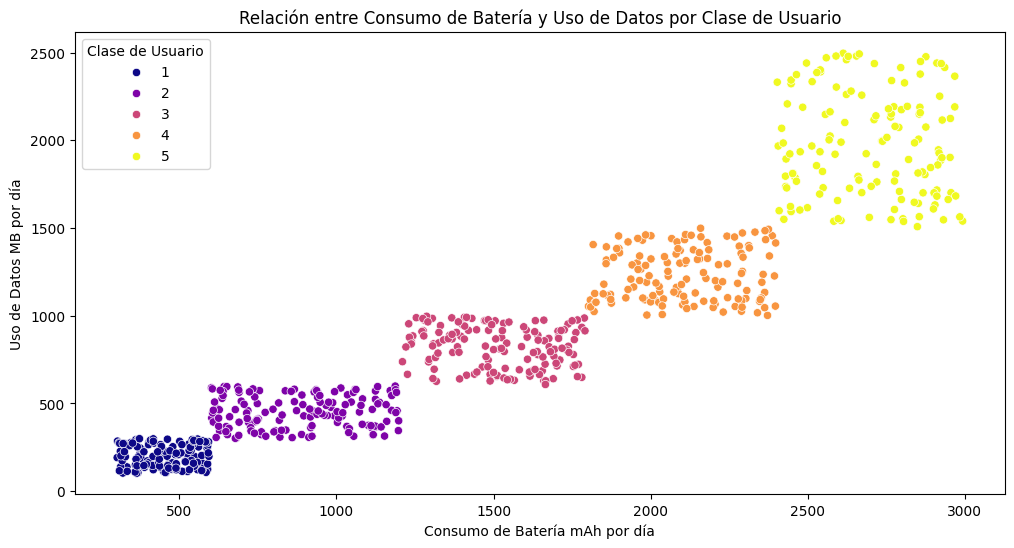

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Battery Drain (mAh/day)', y='Data Usage (MB/day)', data=data_moviles, hue= 'User Behavior Class', palette='plasma')
plt.xlabel('Consumo de Batería mAh por día')
plt.ylabel('Uso de Datos MB por día')
plt.title('Relación entre Consumo de Batería y Uso de Datos por Clase de Usuario')
plt.legend(title='Clase de Usuario')
plt.show()

<ipython-input-32-c3077a330954>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data_moviles, palette='Set2')


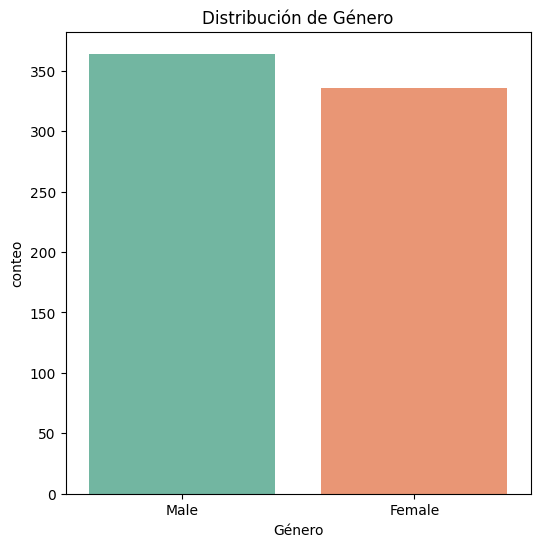

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=data_moviles, palette='Set2')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('conteo')
plt.show()

Text(0.5, 0, 'Género')

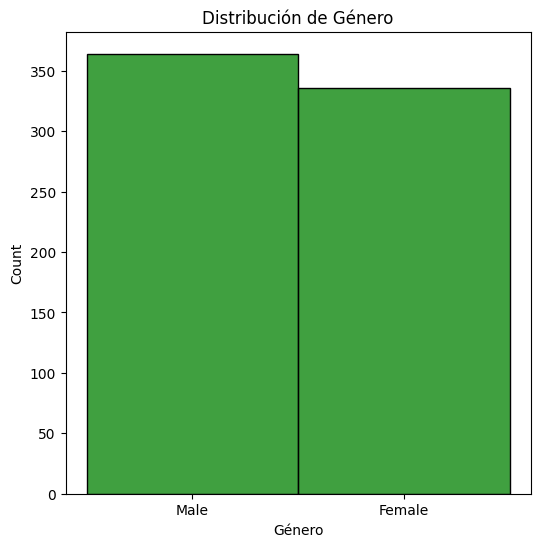

In [33]:
plt.figure(figsize=(6,6))
sns.histplot(data_moviles['Gender'], color='green')
plt.title('Distribución de Género')
plt.xlabel('Género')

<ipython-input-35-aa2368caf5da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=data_moviles, palette='Set3')


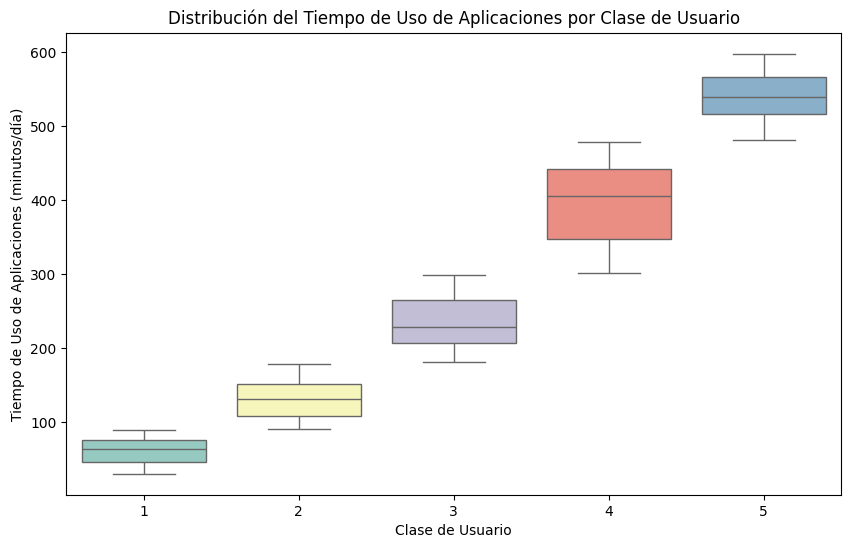

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=data_moviles, palette='Set3')
plt.title('Distribución del Tiempo de Uso de Aplicaciones por Clase de Usuario')
plt.xlabel('Clase de Usuario')
plt.ylabel('Tiempo de Uso de Aplicaciones (minutos/día)')
plt.show()

<ipython-input-43-9a8b6f4e4cfc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y='Number of Apps Installed', data=data_moviles, palette='Set2')


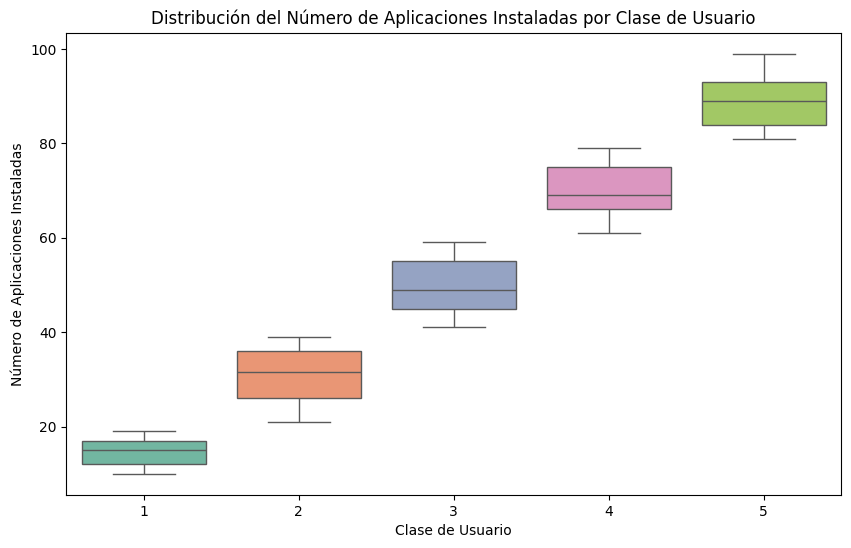

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='User Behavior Class', y='Number of Apps Installed', data=data_moviles, palette='Set2')
plt.title('Distribución del Número de Aplicaciones Instaladas por Clase de Usuario')
plt.xlabel('Clase de Usuario')
plt.ylabel('Número de Aplicaciones Instaladas')
plt.show()

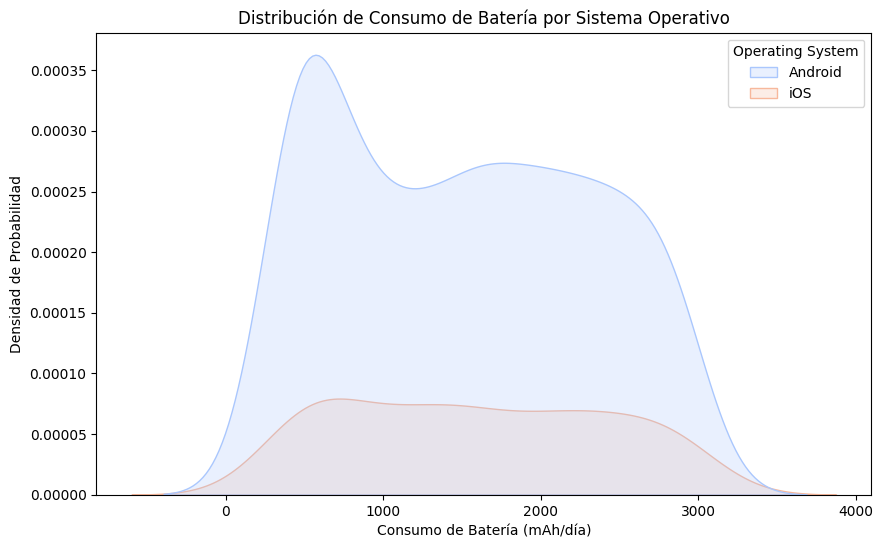

In [42]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data_moviles, x='Battery Drain (mAh/day)', hue='Operating System', palette='coolwarm', fill=True)
plt.title('Distribución de Consumo de Batería por Sistema Operativo')
plt.xlabel('Consumo de Batería (mAh/día)')
plt.ylabel('Densidad de Probabilidad')
plt.show()

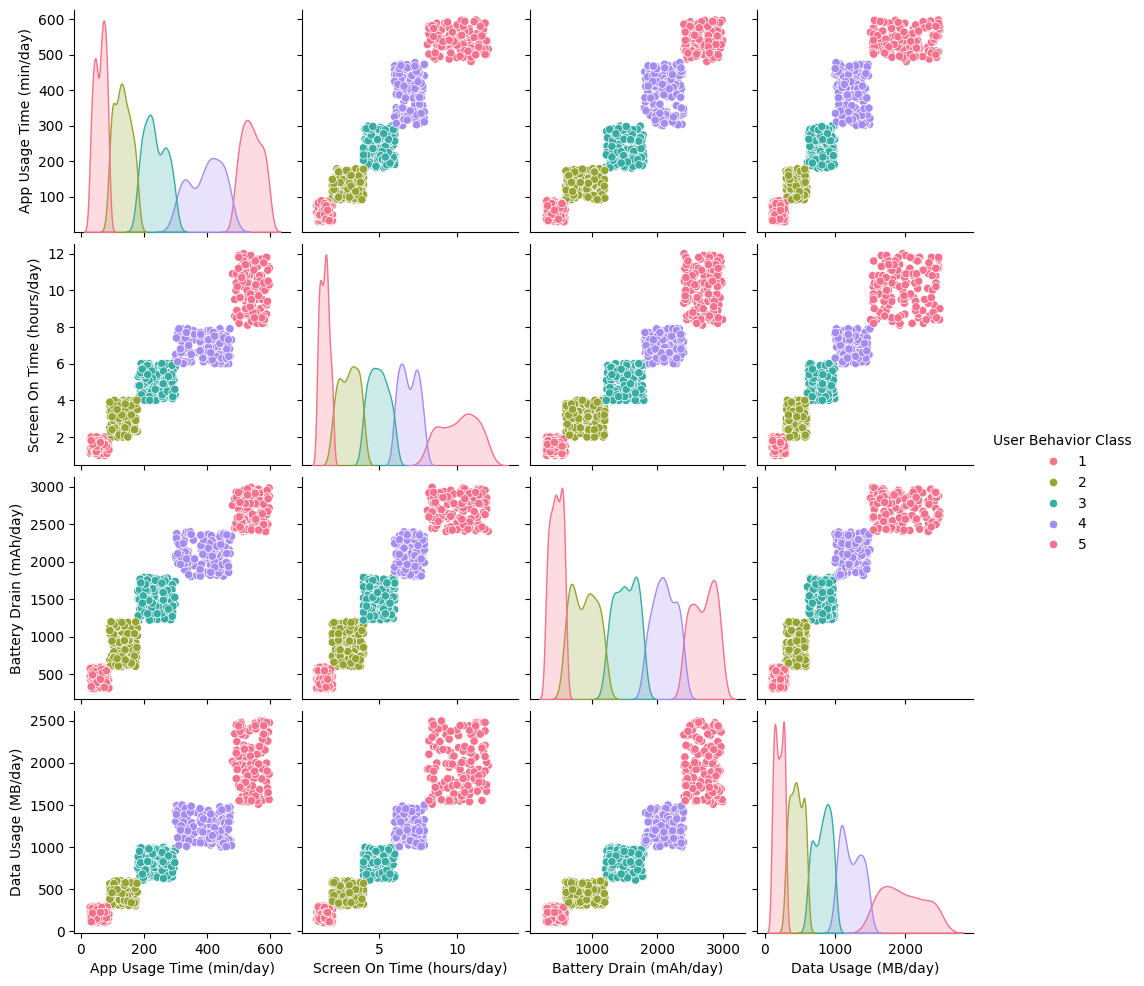

In [46]:
sns.pairplot(data_moviles[['App Usage Time (min/day)','Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'User Behavior Class']], hue='User Behavior Class', palette='husl')
plt.show()


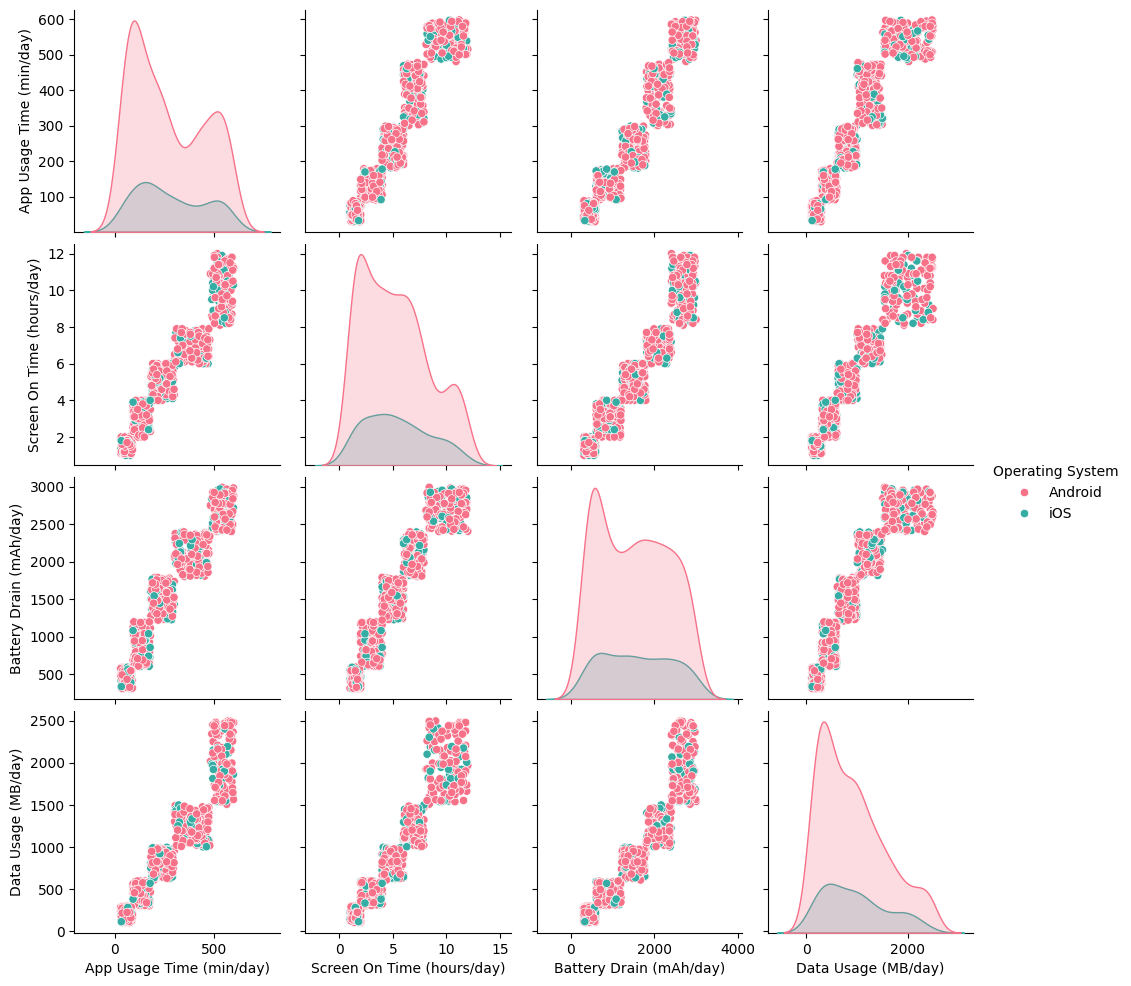

In [47]:
sns.pairplot(data_moviles[['App Usage Time (min/day)','Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Operating System']], hue='Operating System', palette='husl')
plt.show()


# Modelo

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

In [50]:
le_gender = LabelEncoder()
le_os = LabelEncoder()

data_moviles['Gender'] = le_gender.fit_transform(data_moviles['Gender'])
data_moviles['Operating System'] = le_os.fit_transform(data_moviles['Operating System'])

x = data_moviles.drop(columns=['User Behavior Class', 'User ID', 'Device Model'])
y = data_moviles['User Behavior Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



## otras evaluaciones del modelo

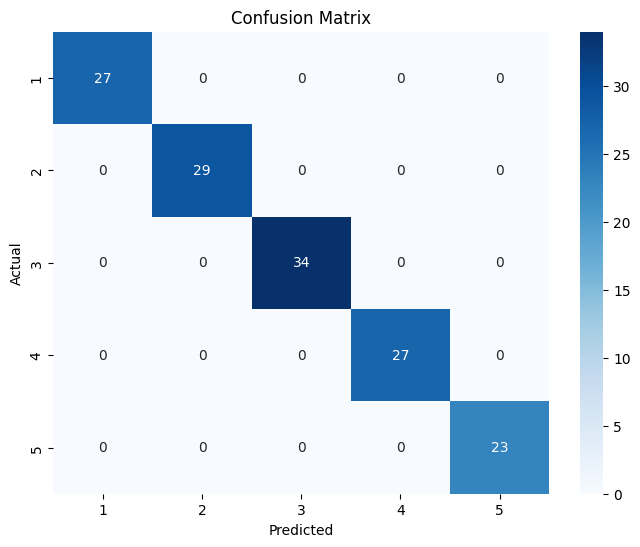

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Validación cruzada de 5 folds
cv_scores = cross_val_score(rf_model, x, y, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation Accuracy: 1.0
